In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
_ = load_iris()
df = pd.DataFrame(data=_.data, columns=_.feature_names)
target = _.target
target_names = _.target_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=True)
df_2d = pd.DataFrame(data=tsne.fit_transform(df), columns=['x', 'y'])
color_map = {0:'red', 1:'blue', 2:'lightgreen'}
df_2d['target'] = target
df_2d['target_color'] = df_2d['target'].apply(lambda t: color_map[t])
df_2d['target_names'] = df_2d['target'].apply(lambda t: target_names[t])
df_2d.head()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.511967
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.540977
[t-SNE] Error after 350 iterations: 1.540977


,x,y,target,target_color,target_names
0,-12.100268,-27.996983,0,red,setosa
1,35.111325,33.269677,0,red,setosa
2,32.851782,16.759881,0,red,setosa
3,35.154411,23.002812,0,red,setosa
4,49.277272,10.127638,0,red,setosa


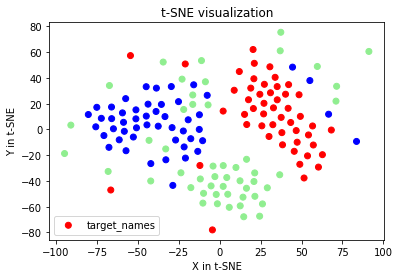

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(data=df_2d, x='x', y='y', c='target_color', label='target_names')
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='lower left')
plt.title('t-SNE visualization')
plt.show()

In [ ]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [28]:
p = figure(tools="pan,wheel_zoom,reset,save")
p.scatter(x="x", y="y", size=8, source=df_2d, fill_color='target_color')
show(p)